# Introduction

Le projet Getaround repose sur l'application mobile du même nom. Cette dernière propose aux utilisateurs de louer leur voiture de particulier à particulier comme le fait AirBnB.

La problématique est la suivante : les retards de rendu des voitures engendrent des annulations sur la prochaine location. L'équipe Getaround travaille à réduire l'impact de ces retards, quitte à imposer un délai de 3 jours entre chaque location. Ce délai représente une perte à la fois pour Getaround et les loueurs particuliers.

Il s'agit donc de travailler les tarifs pour bien les comprendre et à estimer le délai de 3 jours au plus juste pour réduire les pertes.

# Initialisation du projet

In [1]:
# Import des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlabel


# Désactiver l'affichage des warnings
import warnings
warnings.filterwarnings('ignore')

# Analyse des retards

Avant de commencer l'exploration, nous allons lire la documentation fournie par Getaround. Elle indique la définition de chaque feature du dataset fourni.

In [2]:
# notice des features fournie par Getaround
commandes_doc = pd.read_excel('/content/src/get_around_delay_analysis.xlsx', sheet_name='Documentation')
commandes_doc

,field name,Comment
0,rental_id,Unique identifier of the rental
1,car_id,Unique identifier of the car
2,checkin_type,Flow used for both checkin and checkout. (ie. ...
3,state,canceled means that the rental did not happen ...
4,delay_at_checkout_in_minutes,Difference in minutes between the rental end t...
5,previous_ended_rental_id,id of the previous ended rental of the car (NU...
6,time_delta_with_previous_rental_in_minutes,Difference in minutes between this rental plan...


Maintenant, parcourons le dataset des commandes pour savoir ce que l'on y trouve.

In [3]:
# Création du dataframe des commandes
commandes = pd.read_excel('/content/src/get_around_delay_analysis.xlsx')

In [4]:
# Statistiques

print("Number of rows : {}".format(commandes.shape[0]))
print()

print("Display of dataset : ")
display(commandes.head())
print()

print("Basics statistics : ")
data_desc = commandes.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values : ")
display(100*commandes.isnull().sum()/commandes.shape[0])


Number of rows : 21310

Display of dataset : 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN



Basics statistics : 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000



Percentage of missing values : 


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  23.294228
previous_ended_rental_id                      91.360863
time_delta_with_previous_rental_in_minutes    91.360863
dtype: float64

Un fichier de 21310 lignes, dans lequel les colonnes principales des commandes (rental_id, car_id, checking_type et state) sont renseignées à 100%.

Les colonnes suivantes liées aux délais de remise du véhicule ne sont pas renseignées à 100%. Peut-être que ces lignes ne sont renseignées qu'en cas de retard. L'exploration nous en dira plus.


## Feature rental_id

Il s'agit de l'identifiant propre à chaque location.

In [5]:
rentals = commandes['rental_id']
rentals.sort_values().head()

8680    504806
5856    504871
2893    504899
3068    504970
8099    504973
Name: rental_id, dtype: int64

Déjà, on peut voir que les identifiants ne se suivent pas. Il s'agit peut-être d'un dataset fourni certainement après nettoyage ou après échantillonnage.

In [6]:
#Y a-t-il des doublons
unique_commande = commandes['rental_id'].unique().shape[0]
if (unique_commande == commandes.shape[0]):
  print('Il y a bien un identifiant unique par commande')
else:
  print(f' Il y a {commandes.shape[0] - unique_commande} identifiants en doublon')

Il y a bien un identifiant unique par commande


L'identifiant joue bien son rôle car il est :
* unique par commande
* indiqué pour chaque commande du dataset.

## Feature car_id

L'identifiant car_id permet d'identifier les véhicules.

In [7]:
cars = commandes['car_id']
cars.sort_values(ascending=False).head()

17927    417675
3423     417181
14325    416992
6797     416935
7134     416930
Name: car_id, dtype: int64

In [8]:
print(f"L'identifiant car_id compte {len(cars.unique())} dans ce dataset entre :")
print(f" - un minimum de : {cars.min()}")
print(f" - et un maximum de : {cars.max()}")

L'identifiant car_id compte 8143 dans ce dataset entre :
 - un minimum de : 159250
 - et un maximum de : 417675


In [9]:
# Combien de commandes par véhicule ?
commandes_par_car = commandes.value_counts(subset='car_id')
commandes_par_car_max = commandes_par_car.max()
commandes_par_car_min = commandes_par_car.min()
commandes_par_car_mean = commandes_par_car.mean().round(1)
print("A noter : ")
print("----------")

print(f"En moyenne, un véhicule a été loué {commandes_par_car_mean} fois :")
print(f" - Au minimum : {commandes_par_car_min} fois")
print(f" - Au maximum : {commandes_par_car_max} fois")


A noter : 
----------
En moyenne, un véhicule a été loué 2.6 fois :
 - Au minimum : 1 fois
 - Au maximum : 33 fois


## Feature checkin_type

In [10]:
modes = commandes['checkin_type']
modes_unique = modes.unique()
modes_list = []

for mode in modes_unique:
  print(f"Checking type : {mode}")
  mode_occur = len(commandes[commandes['checkin_type'] == mode])
  mode_pourcent = mode_occur * 100 / commandes.shape[0]
  print(f"{mode_occur} soit {mode_pourcent}")
  liste = (mode, mode_occur, mode_pourcent)
  modes_list.append(liste)

  print('---')

Checking type : mobile
17003 soit 79.78883153449085
---
Checking type : connect
4307 soit 20.21116846550915
---


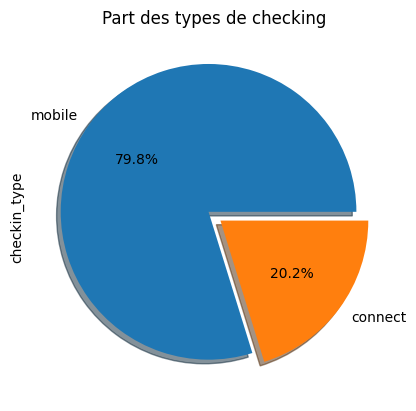

In [11]:
commandes['checkin_type'].value_counts().plot(kind="pie",
                                              title="Part des types de checking",
                                              autopct='%1.1f%%',
                                              shadow=True,
                                              explode=[0.05, 0.05])
print()

In [12]:
retards_mn = commandes['delay_at_checkout_in_minutes'] > 0
retards_mn.groupby(commandes['checkin_type']).sum(numeric_only=True).apply(lambda x: x/60).round(1)

checkin_type
connect     24.3
mobile     132.4
Name: delay_at_checkout_in_minutes, dtype: float64

Visiblement le checkin_type est impactant sur les retards car ils sont :
* En volume, 4 fois plus importants sur les commandes mobile que sur les commandes connect,
* En durée, plus de 5 fois plus longs sur les commandes mobile que connect.

Les clients checking mobile seraient-ils plus en retard que ceux sur mobile ? Un retard de 132 heures est particulièrement inquiétant. Il manque une donnée qui pourrait expliquer ce phénomène.

## Feature state

La feature state nous permet de savoir l'état de la commande.

ended       18045
canceled     3265
Name: state, dtype: int64
---



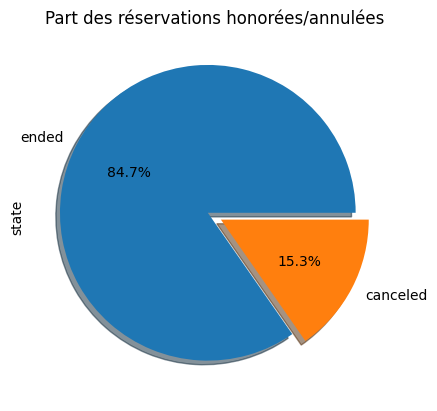

In [13]:
print(commandes['state'].value_counts())
print('---')
commandes['state'].value_counts().plot(kind="pie",
                                              title="Part des réservations honorées/annulées",
                                              autopct='%1.1f%%',
                                              shadow=True,
                                              explode=[0.05, 0.05])
print()

In [14]:
resa_canceled = commandes[commandes['state'] == 'canceled']
resa_canceled.groupby('checkin_type').mean()

,rental_id,car_id,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
checkin_type,,,,,
connect,551249.274436,337442.234336,NaN,551298.083969,300.000000
mobile,547792.913255,354836.698014,-17468.0,550399.010204,288.061224


D'après les réservations annulées, on tire 2 enseignements intéressants :

1.   S'il y a chevauchement entre le retard et la commande suivante (annulée), cette durée est de 6 heures
2.   Il y a des clients mobile dont la réservation était annulée et qui ont pourtant réussi à rendre le véhicule en moyenne 17468 minutes en avance, soit 291h, soit plus de 12 jours en avance.



In [15]:
resa_canceled['delay_at_checkout_in_minutes'].value_counts()

-17468.0    1
Name: delay_at_checkout_in_minutes, dtype: int64

Il s'agit d'un seul client qui a rendu sa voiture 12 jours en avance. On voit qu'il s'agit d'un cas exceptionnel ou bien d'une erreur de saisie. On considèrera cette ligne comme aberrante.

## Feature delay_at_checkout_in_minutes

La documentation nous indique qu'il s'agit de la différence en minutes entre l'heure prévue de rendu de la voiture dans le contrat et l'heure de rendu effective. Les valeurs négatives représentent des retards.

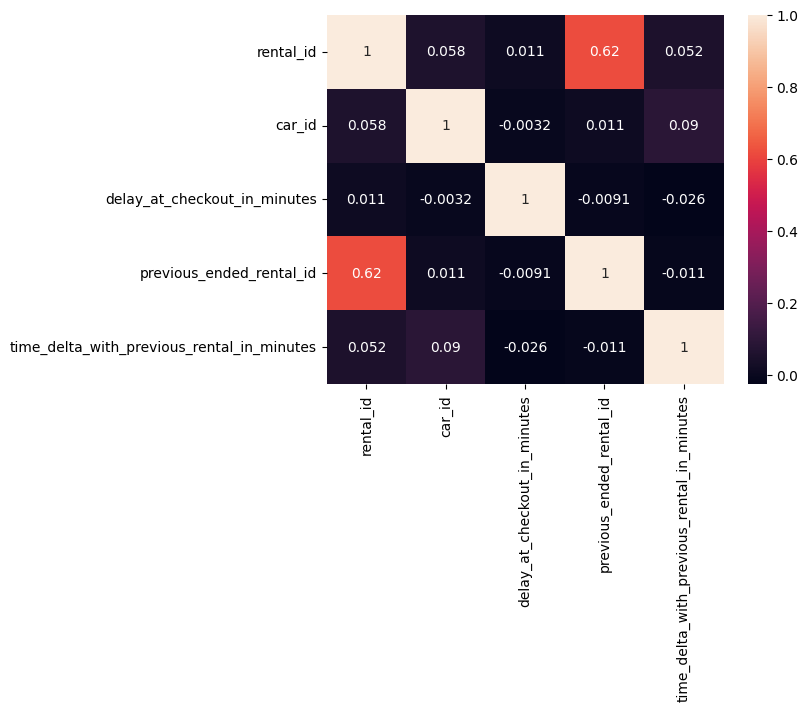

In [16]:
retards = commandes[commandes['delay_at_checkout_in_minutes'] < 0]
retards_corr = retards.corr(numeric_only=True)
sns.heatmap(retards_corr, annot=True)
print()

La feature delay_at_checkout_in_minutes ne présente pas de corrélation particulière avec les autres features du dataset. Alors, poursuivons l'analyse pour voir ce que l'on peut ressortir de cette feature.

In [17]:
# Durée des retards
retards_min = abs(retards['delay_at_checkout_in_minutes'].min().round(1)) # Le minimum correspond au plus grand retard en minutes
retards_max = abs(retards['delay_at_checkout_in_minutes'].max().round(1)) # Le maximum correspond au plus petit retard en minutes
retards_mean = abs(retards['delay_at_checkout_in_minutes'].mean().round(1)) # Moyenne
retards_median = abs(retards['delay_at_checkout_in_minutes'].median().round(1)) # Mediane
retards_pourcent = int((len(retards)*100/commandes.shape[0]))

print(f"Les retards représentent {len(retards)} commandes, soit {retards_pourcent}% du dataset avec :")
print(f" - une moyenne de {int(retards_mean)} minutes")
print(f" - une médiane de {int(retards_median)} minutes")
print(f" - un minimum de {int(retards_max)} minutes")
print(f" - et un maximum de : {retards_min} minutes, soit {((retards_min/60)/24).round(1)} jours")


Les retards représentent 6820 commandes, soit 32% du dataset avec :
 - une moyenne de 135 minutes
 - une médiane de 52 minutes
 - un minimum de 1 minutes
 - et un maximum de : 22433.0 minutes, soit 15.6 jours


Analyser 6820 retards, c'est-à-dire 1/3 du dataset nécessite de synthétiser l'information. Pour cela, nous allons qualifier les retards sur 6 tranches de :
* 0 à 30 minutes
* 31 à 60 minutes
* 1 à 2 heures
* 2 à 6 heures
* 6 à 24 heures
* Plus de 24 heures


In [18]:
# qualification de la durée
retards['duree'] = retards['delay_at_checkout_in_minutes'].apply(lambda x: '0 to 30 minutes' if ((x >= -30) & (x <= 0))
                                                                    else '31 to 60 minutes' if ((x >= -60) & (x <= -31))
                                                                    else '1 to 2 hours' if ((x >= -120) & (x <= -61))
                                                                    else '2 to 3 hours' if ((x >= -180) & (x <= -121))
                                                                    else '3 to 6 hours' if ((x >= -360) & (x <= -181))
                                                                    else '6 to 24 hours' if ((x >= -1440) & (x <= -361))
                                                                    else 'More than 24 hours')

retards.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,duree
1,507750,269550,mobile,ended,-81.0,NaN,NaN,1 to 2 hours
5,511626,398802,mobile,ended,-203.0,NaN,NaN,3 to 6 hours
6,511639,370585,connect,ended,-15.0,563782.0,570.0,0 to 30 minutes
7,512303,371242,mobile,ended,-44.0,NaN,NaN,31 to 60 minutes
15,518282,364160,connect,ended,-81.0,NaN,NaN,1 to 2 hours


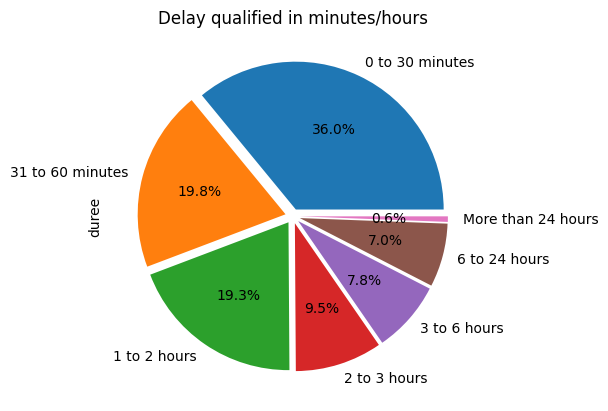

In [19]:
labels = ['0 to 30 minutes', '31 to 60 minutes', '1 to 2 hours', '2 to 3 hours', '3 to 6 hours', '6 to 24 hours', 'More than 24 hours']

retards['duree'].value_counts().plot(kind='pie',
                                     labels = labels,
                                     title="Delay qualified in minutes/hours",
                                     autopct='%1.1f%%',
                                     shadow=False,
                                     explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])
print()

Si nous avions eu l'identifiant du client, on aurait pu calculer la moyenne de retards par client. Dans notre cas, nous n'avons pas de moyen de segmenter les clients entre les ponctuels et les retardataires.

La seule data client dont nous disposons est le type de checking : mobile ou connect. Comparons alors les retards en prenant en compte la feature checkin_type.

In [20]:
labels = ['0 to 30 minutes', '31 to 60 minutes', '1 to 2 hours', '2 to 3 hours', '3 to 6 hours', '6 to 24 hours', 'More than 24 hours']

retards_checking = retards[['duree', 'checkin_type']].groupby('duree').value_counts()
retards_checking = pd.DataFrame(retards_checking).reset_index()
retards_checking.columns=['duree', 'checkin_type', 'retard']
retards_checking

,duree,checkin_type,retard
0,0 to 30 minutes,mobile,1874
1,0 to 30 minutes,connect,578
2,1 to 2 hours,mobile,949
3,1 to 2 hours,connect,402
4,2 to 3 hours,mobile,424
5,2 to 3 hours,connect,225
6,3 to 6 hours,mobile,351
7,3 to 6 hours,connect,183
8,31 to 60 minutes,mobile,968
9,31 to 60 minutes,connect,351


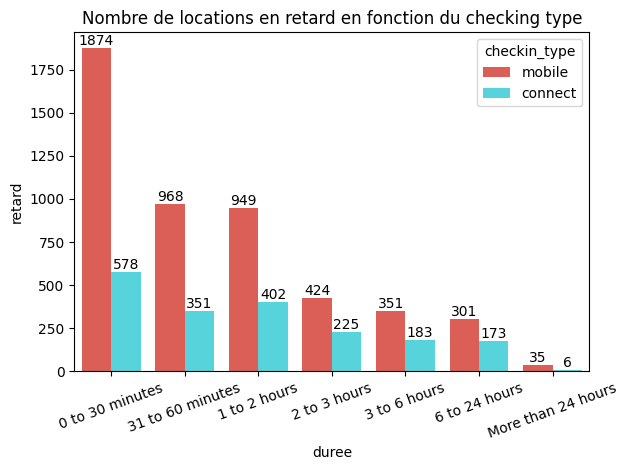

In [21]:
ax = sns.barplot(x = 'duree', y = 'retard', hue = 'checkin_type', data = retards_checking,
            palette = 'hls',
            order = labels,
            capsize = 0.02,
            saturation = 8
            )
ax.set(title='Nombre de locations en retard en fonction du checking type')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=20)
plt.tight_layout()

In [22]:
retards_mobile = retards_checking[retards_checking['checkin_type'] == 'mobile']['retard'].sum()
retards_connect = retards_checking[retards_checking['checkin_type'] == 'connect']['retard'].sum()
retards_mobile_rapport = (retards_mobile/retards_connect).round(1)
print(f"Il y a {retards_mobile} retards mobile pour {retards_connect} retards connect")
print(f"Les clients mobile sont {retards_mobile_rapport} fois plus en retard que les clients connect")

Il y a 4902 retards mobile pour 1918 retards connect
Les clients mobile sont 2.6 fois plus en retard que les clients connect


Nous avons désormais une vision plus précise des délais de retard :
* On distingue 3 paliers de retards :
  * 0/30 minutes
  * 31 minutes à 2 heures
  * plus de 2 heures
* Les clients mobile sont 2 à 3 fois plus nombreux en retard que les clients connect

# Analyse des équipes Getaround sur les délais de carence des véhicules

Les équipes envisagent de rendre indisponibles les voitures un certain temps (threshold) avant de les rendre disponibles à la location. Cela signifie que l'on pourrait louer un véhicule seulement x minutes après la location précédente pour éviter l'overbooking.

Néanmoins, certains clients sont plus ponctuels que d'autres. Il s'agirait de cibler les clients les plus retardataires (scope). Comme nous n'avons que les données checkin_type pour cibler les clients, le scope devrait couvrir l'une ou l'autre de ces catégories mobile/connect ou bien les 2.

Très nettement, pour réduire les retards de façon drastique, on peut déjà se diriger a minima vers une marge de disponibilité des voitures selon les paramètres suivants :
* scope : agir sur les clients mobile
* threshold : un délai de 2 heures avant disponibilité pour location